In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('Steel_industry_data.csv')
print(data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [4]:
print(data.dtypes)

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object


In [5]:
data.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


/var/folders/r6/_4rtw4x15jl5hfx0kh89bl7r0000gn/T/ipykernel_1691/2558997284.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='WeekStatus', y='Usage_kWh', ci=None,  palette=colors)
/var/folders/r6/_4rtw4x15jl5hfx0kh89bl7r0000gn/T/ipykernel_1691/2558997284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='WeekStatus', y='Usage_kWh', ci=None,  palette=colors)


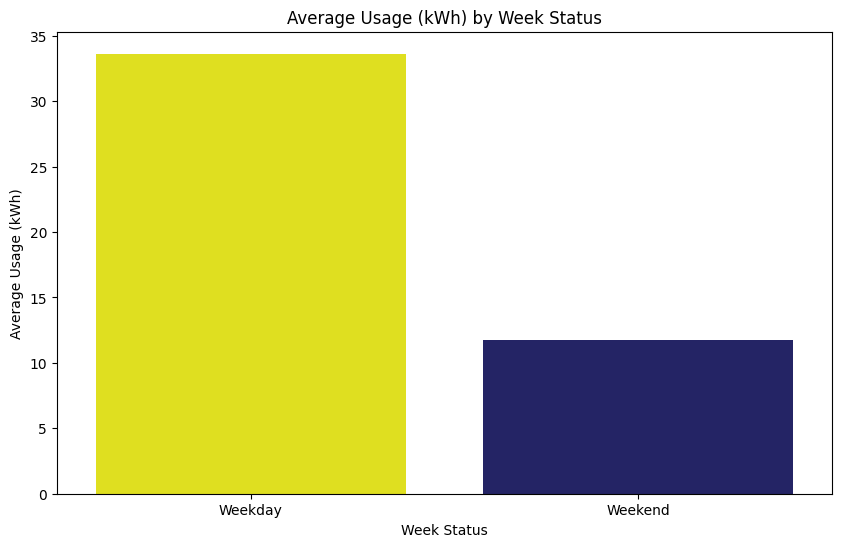

In [6]:
colors = {'Weekday': 'yellow', 'Weekend': 'midnightblue'}

# Bar plot for WeekStatus vs. Usage_kWh
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='WeekStatus', y='Usage_kWh', ci=None,  palette=colors)
plt.title('Average Usage (kWh) by Week Status')
plt.xlabel('Week Status')
plt.ylabel('Average Usage (kWh)')
plt.show()


/var/folders/r6/_4rtw4x15jl5hfx0kh89bl7r0000gn/T/ipykernel_1691/2680519145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Day_of_week', y='Usage_kWh', palette='Set3')


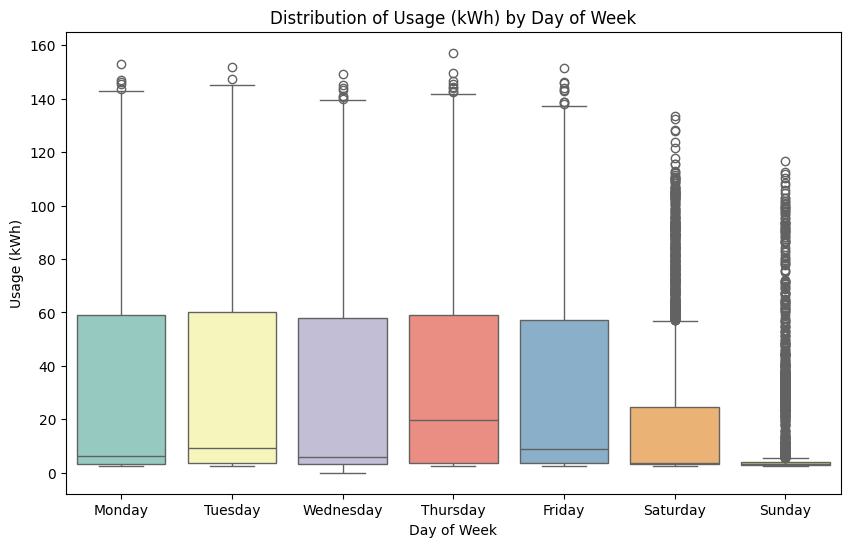

In [7]:
# Box plot for Usage_kWh with Day_of_week
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Day_of_week', y='Usage_kWh', palette='Set3')
plt.title('Distribution of Usage (kWh) by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Usage (kWh)')
plt.show()

/var/folders/r6/_4rtw4x15jl5hfx0kh89bl7r0000gn/T/ipykernel_1691/2539759568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Load_Type', y='Usage_kWh', palette='Set3')


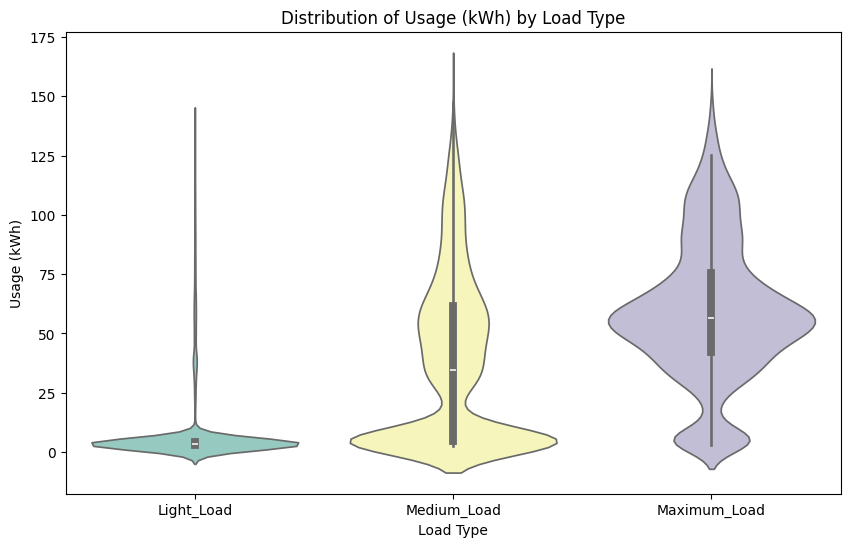

In [8]:
# Violin plot for Load_Type vs. Usage_kWh
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Load_Type', y='Usage_kWh', palette='Set3')
plt.title('Distribution of Usage (kWh) by Load Type')
plt.xlabel('Load Type')
plt.ylabel('Usage (kWh)')
plt.show()

In [9]:
print(data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [10]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

data = data.dropna(subset=['date'])

data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'])

data['date'] = data['date'].astype(np.int64) // 10**9  # Convert datetime to Unix timestamp in seconds

X = data.drop(columns=['Usage_kWh'])
y = data['Usage_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate models
mae_rf = mean_absolute_error(y_test, rf_pred)
mae_gb = mean_absolute_error(y_test, gb_pred)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_rf = mean_absolute_percentage_error(y_test, rf_pred)
mape_gb = mean_absolute_percentage_error(y_test, gb_pred)

print("Random Forest MAE:", mae_rf)
print("Gradient Boosting MAE:", mae_gb)
print("Random Forest MAPE:", mape_rf)
print("Gradient Boosting MAPE:", mape_gb)

Random Forest MAE: 0.5662045569620254
Gradient Boosting MAE: 1.8816441650958653
Random Forest MAPE: 1.8750783132037259
Gradient Boosting MAPE: 11.686982055529889


In [11]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    # Making predictions
    y_pred = model.predict(X_test)
    # Calculating performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Appending results
    results.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R2 Score": r2})

performance_results = pd.DataFrame(results)

print("Model Performance Results:")
print(performance_results)

Model Performance Results:
               Model       MAE      RMSE  R2 Score
0      Random Forest  0.566205  1.466814  0.998156
1  Gradient Boosting  1.881644  3.250611  0.990944
